In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns

%matplotlib inline
password = getpass.getpass()
connection_string = 'mysql+pymysql://root:' + password + '@localhost/Sakila'
engine = create_engine(connection_string)

········


In [2]:
query = '''select f.title, count(i.inventory_id) as num_rental
from film as f
join inventory as i
using (film_id)
group by f.title
order by f.title desc;'''

data = pd.read_sql_query(query, engine)
data.head()

,title,num_rental
0,ZORRO ARK,8
1,ZOOLANDER FICTION,5
2,ZHIVAGO CORE,2
3,YOUTH KICK,2
4,YOUNG LANGUAGE,2


In [3]:
data['num_rental'].value_counts()

6    187
4    183
5    136
2    133
3    131
7    116
8     72
Name: num_rental, dtype: int64

In [4]:
data.shape

(958, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       958 non-null    object
 1   num_rental  958 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 15.1+ KB


In [6]:
data.isna().sum()

title         0
num_rental    0
dtype: int64

In [7]:
data = data[data['num_rental'].isna() == False]

In [8]:
data.isna().sum()

title         0
num_rental    0
dtype: int64

In [9]:
data['num_rental'].value_counts()

6    187
4    183
5    136
2    133
3    131
7    116
8     72
Name: num_rental, dtype: int64

In [10]:
query = '''select f.title, r.rental_date
from film as f
join inventory i
using (film_id)
join rental as r
using (inventory_id)
order by r.rental_date desc;'''

data1 = pd.read_sql_query(query, engine)
data1.head()

,title,rental_date
0,SCARFACE BANG,2006-02-14 15:16:03
1,SEABISCUIT PUNK,2006-02-14 15:16:03
2,SEATTLE EXPECATIONS,2006-02-14 15:16:03
3,SHAWSHANK BUBBLE,2006-02-14 15:16:03
4,SHOCK CABIN,2006-02-14 15:16:03


In [11]:
data1.rental_date.unique()

array(['2006-02-14T15:16:03.000000000', '2005-08-23T22:50:12.000000000',
       '2005-08-23T22:43:07.000000000', ...,
       '2005-05-24T23:03:39.000000000', '2005-05-24T22:54:33.000000000',
       '2005-05-24T22:53:30.000000000'], dtype='datetime64[ns]')

In [12]:
data1['month'] = data1['rental_date'].dt.month

In [13]:
data1

,title,rental_date,month
0,SCARFACE BANG,2006-02-14 15:16:03,2
1,SEABISCUIT PUNK,2006-02-14 15:16:03,2
2,SEATTLE EXPECATIONS,2006-02-14 15:16:03,2
3,SHAWSHANK BUBBLE,2006-02-14 15:16:03,2
4,SHOCK CABIN,2006-02-14 15:16:03,2
...,...,...,...
16039,IDOLS SNATCHERS,2005-05-24 23:05:21,5
16040,LOVE SUICIDES,2005-05-24 23:04:41,5
16041,GRADUATE LORD,2005-05-24 23:03:39,5
16042,FREAKY POCUS,2005-05-24 22:54:33,5


In [15]:
data1.month.unique()

array([2, 8, 7, 6, 5])

In [16]:
data1['month'].dtype

dtype('int64')

In [17]:
data1['yes'] = np.where(data1['month']==2, 'yes', 'no')
print(data1)

                     title         rental_date  month  yes
0            SCARFACE BANG 2006-02-14 15:16:03      2  yes
1          SEABISCUIT PUNK 2006-02-14 15:16:03      2  yes
2      SEATTLE EXPECATIONS 2006-02-14 15:16:03      2  yes
3         SHAWSHANK BUBBLE 2006-02-14 15:16:03      2  yes
4              SHOCK CABIN 2006-02-14 15:16:03      2  yes
...                    ...                 ...    ...  ...
16039      IDOLS SNATCHERS 2005-05-24 23:05:21      5   no
16040        LOVE SUICIDES 2005-05-24 23:04:41      5   no
16041        GRADUATE LORD 2005-05-24 23:03:39      5   no
16042         FREAKY POCUS 2005-05-24 22:54:33      5   no
16043      BLANKET BEVERLY 2005-05-24 22:53:30      5   no

[16044 rows x 4 columns]


In [18]:
data1

,title,rental_date,month,yes
0,SCARFACE BANG,2006-02-14 15:16:03,2,yes
1,SEABISCUIT PUNK,2006-02-14 15:16:03,2,yes
2,SEATTLE EXPECATIONS,2006-02-14 15:16:03,2,yes
3,SHAWSHANK BUBBLE,2006-02-14 15:16:03,2,yes
4,SHOCK CABIN,2006-02-14 15:16:03,2,yes
...,...,...,...,...
16039,IDOLS SNATCHERS,2005-05-24 23:05:21,5,no
16040,LOVE SUICIDES,2005-05-24 23:04:41,5,no
16041,GRADUATE LORD,2005-05-24 23:03:39,5,no
16042,FREAKY POCUS,2005-05-24 22:54:33,5,no


In [19]:
data1 = data1.drop(['rental_date'], axis=1)

In [20]:
data1

,title,month,yes
0,SCARFACE BANG,2,yes
1,SEABISCUIT PUNK,2,yes
2,SEATTLE EXPECATIONS,2,yes
3,SHAWSHANK BUBBLE,2,yes
4,SHOCK CABIN,2,yes
...,...,...,...
16039,IDOLS SNATCHERS,5,no
16040,LOVE SUICIDES,5,no
16041,GRADUATE LORD,5,no
16042,FREAKY POCUS,5,no


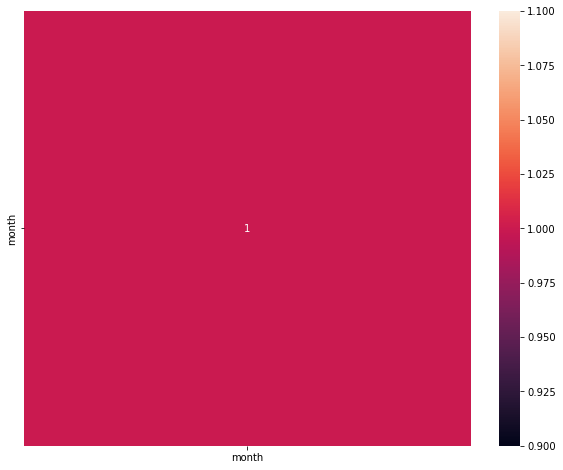

In [23]:
corr_matrix=data1.corr(method='pearson')  
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

/Users/federicogarciaochoa/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


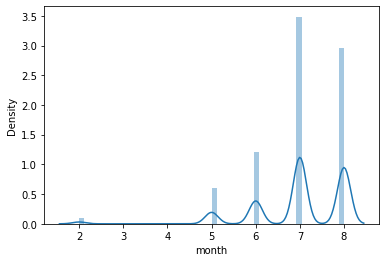

In [24]:
sns.distplot(data1['month'])
plt.show()

In [25]:
X = data1.select_dtypes(include = np.number)

transformer = StandardScaler().fit(X)
x_normalized = transformer.transform(X)
x = pd.DataFrame(x_normalized)
x.columns = X.columns
x.head()

,month
0,-4.842554
1,-4.842554
2,-4.842554
3,-4.842554
4,-4.842554


In [29]:
cat = data1.select_dtypes(include = np.object)
cat = cat.drop(['yes'], axis=1)
categorical = pd.get_dummies(cat, columns=['title'])

/var/folders/jh/xz8c361s5l5d9_1ct6s4mw940000gn/T/ipykernel_23564/132035864.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat = data1.select_dtypes(include = np.object)


In [31]:
y = data1['yes'] # Target appart
X = np.concatenate((x, categorical), axis=1) # Numerical and dummies from categoricals

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [33]:
classification = LogisticRegression(random_state=0, multi_class='multinomial').fit(X_train, y_train)

In [34]:
predictions = classification.predict(X_test)

In [35]:
pd.Series(predictions).value_counts()

no     4752
yes      62
dtype: int64

In [36]:
y_test.value_counts()

no     4752
yes      62
Name: yes, dtype: int64

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[4752,    0],
       [   0,   62]])

/var/folders/jh/xz8c361s5l5d9_1ct6s4mw940000gn/T/ipykernel_23564/3936370356.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.subplot().xaxis.set_ticklabels(["no","yes"])
/var/folders/jh/xz8c361s5l5d9_1ct6s4mw940000gn/T/ipykernel_23564/3936370356.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.subplot().yaxis.set_ticklabels(["no","yes"])


[Text(0, 0.0, 'no'),
 Text(0, 0.2, 'yes'),
 Text(0, 0.4, ''),
 Text(0, 0.6000000000000001, ''),
 Text(0, 0.8, ''),
 Text(0, 1.0, '')]

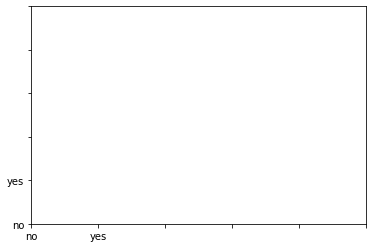

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True,fmt='g')
plt.subplot().xaxis.set_ticklabels(["no","yes"])
plt.subplot().yaxis.set_ticklabels(["no","yes"])

In [39]:
classification.score(X_test, y_test)

1.0

In [40]:
from sklearn.metrics import accuracy_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, predictions)))


Accuracy: 1.00



In [41]:
from sklearn import metrics
import matplotlib.pyplot as plt

y_pred_proba = classification.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr)

ValueError: y_true takes value in {'no', 'yes'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.